# Importing necessary libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the data

In [16]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

# Exploratory Data Analysis

### Exploring and Preparing the Training Data

In [9]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [10]:
# data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23367 entries, 0 to 23366
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             23367 non-null  int64  
 1   trans_date_trans_time  23367 non-null  object 
 2   cc_num                 23367 non-null  int64  
 3   merchant               23367 non-null  object 
 4   category               23367 non-null  object 
 5   amt                    23367 non-null  float64
 6   first                  23367 non-null  object 
 7   last                   23367 non-null  object 
 8   gender                 23367 non-null  object 
 9   street                 23367 non-null  object 
 10  city                   23367 non-null  object 
 11  state                  23367 non-null  object 
 12  zip                    23367 non-null  int64  
 13  lat                    23367 non-null  float64
 14  long                   23367 non-null  float64
 15  ci

In [17]:
# shape of the data
train_data.shape

(73924, 23)

In [12]:
# summary statistics
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,23367.000000,2.336700e+04,23367.000000,23367.000000,23367.000000,23367.000000,2.336700e+04,2.336700e+04,23367.000000,23367.000000,23366.000000
mean,11683.000000,4.219398e+17,71.206334,48786.764326,38.514941,-90.269911,9.064923e+04,1.325981e+09,38.517688,-90.270958,0.008388
std,6745.616206,1.315906e+18,147.287009,27024.707520,5.111352,14.014022,3.013055e+05,3.483494e+05,5.139009,14.033250,0.091204
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,5841.500000,1.800429e+14,9.660000,25526.000000,34.668900,-96.809400,7.430000e+02,1.325703e+09,34.759848,-96.966720,0.000000
50%,11683.000000,3.519233e+15,48.300000,48088.000000,39.319900,-87.476900,2.501000e+03,1.325968e+09,39.325464,-87.436253,0.000000
75%,17524.500000,4.642255e+15,83.550000,72042.000000,41.825000,-80.124800,2.112500e+04,1.326288e+09,41.893182,-80.137093,0.000000
max,23366.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326564e+09,66.659242,-66.967742,1.000000


In [13]:
# datatypes
train_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [14]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,23367.000000,2.336700e+04,23367.000000,23367.000000,23367.000000,23367.000000,2.336700e+04,2.336700e+04,23367.000000,23367.000000,23366.000000
mean,11683.000000,4.219398e+17,71.206334,48786.764326,38.514941,-90.269911,9.064923e+04,1.325981e+09,38.517688,-90.270958,0.008388
std,6745.616206,1.315906e+18,147.287009,27024.707520,5.111352,14.014022,3.013055e+05,3.483494e+05,5.139009,14.033250,0.091204
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,5841.500000,1.800429e+14,9.660000,25526.000000,34.668900,-96.809400,7.430000e+02,1.325703e+09,34.759848,-96.966720,0.000000
50%,11683.000000,3.519233e+15,48.300000,48088.000000,39.319900,-87.476900,2.501000e+03,1.325968e+09,39.325464,-87.436253,0.000000
75%,17524.500000,4.642255e+15,83.550000,72042.000000,41.825000,-80.124800,2.112500e+04,1.326288e+09,41.893182,-80.137093,0.000000
max,23366.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326564e+09,66.659242,-66.967742,1.000000


In [18]:
# checking for missing values
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

### Data Visualization

#### Visualizing Fraud vs. Non-Fraud Transactions

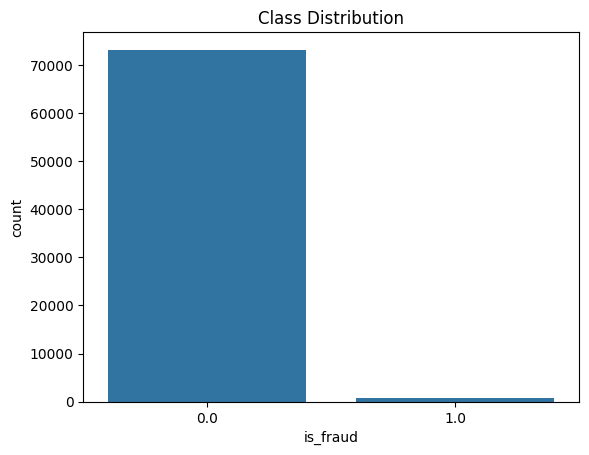

In [19]:
sns.countplot(x = 'is_fraud', data = train_data)
plt.title('Class Distribution')
plt.show()

* The plot visually presents the distribution of transactions into two categories - fraud (1) and non-fraud (0). This categorical breakdown allows us to understand the composition of the dataset based on the occurrence of fraudulent and non-fraudulent transactions.
* On the plot, the x-axis corresponds to the two categories (fraud or non-fraud), while the y-axis quantifies the count of transactions within each category. The height of each bar represents the number of transactions belonging to each category, providing a clear visual representation of the distribution.
* The plot clearly highlights a significant class imbalance between fraudulent (Class 1) and non-fraudulent (Class 0) transactions. This awareness is crucial for developing an effective fraud detection model, as it indicates that the dataset contains far fewer instances of fraudulent transactions compared to non-fraudulent ones.


#### Correlation Matrix of Features: Understanding Relationships in the Dataset

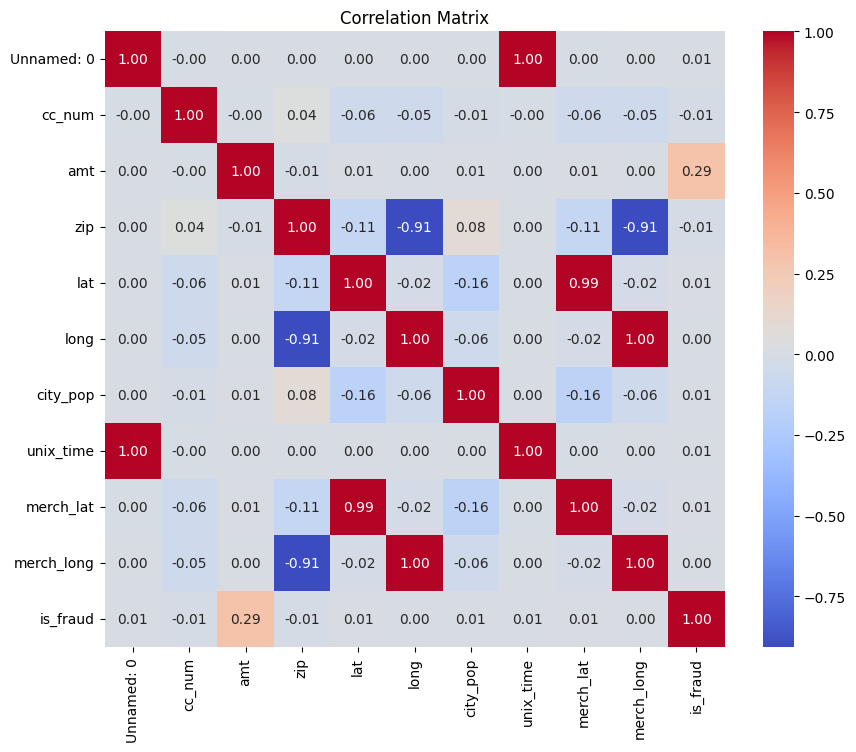

In [20]:
# Select only numerical columns for correlation calculation
numeric_columns = train_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* The correlation matrix provides a numerical measure of the linear relationship between pairs of numerical features. Positive values indicate a positive correlation (both variables increase or decrease together), negative values indicate a negative correlation (one variable increases while the other decreases), and values close to zero suggest little to no linear relationship.
* The correlation coefficient of 1 indicates a perfect positive correlation between merch_long and long. This suggests that the longitude of the merchant location (merch_long) and the longitude of the transaction location (long) are perfectly linearly related. This could indicate that transactions tend to occur at the same longitude as the merchant location.
* The high negative correlation coefficient suggests a strong negative correlation between merch_long and zip. This indicates that as the longitude of the merchant location (merch_long) increases (moves eastward), the zip code associated with the transaction (zip) tends to decrease (representing a location moving westward). This could imply a spatial relationship between merchant locations and zip codes.
* The correlation coefficient close to 1 indicates a very strong positive correlation between merch_lat and lat. This suggests that the latitude of the merchant location (merch_lat) and the latitude of the transaction location (lat) are highly linearly related. Transactions tend to occur at locations with nearly identical latitudes as the merchant location.
* The positive correlation coefficient suggests a weak positive correlation between the transaction amount (amt) and the likelihood of fraud (is_fraud). This implies that higher transaction amounts may be slightly associated with a higher likelihood of being fraudulent. However, the correlation coefficient is relatively low, indicating that the relationship is not very strong.

#### Proportion of Categories in the Dataset: Pie Chart Representation

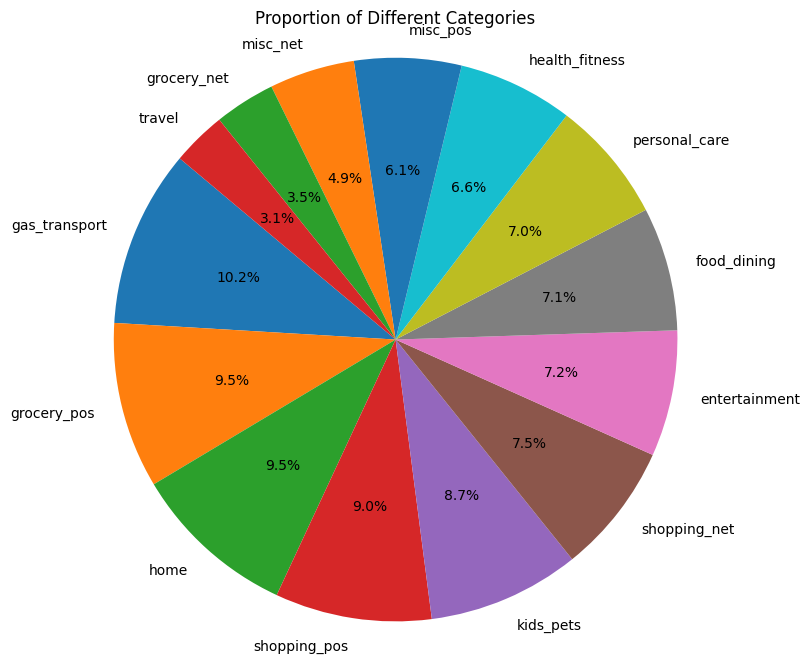

In [ ]:
# Calculate the frequency of each category
category_counts = train_data['category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


* The pie chart visually represents the distribution of transactions across different categories. Each segment of the pie corresponds to a specific category, allowing for a quick and intuitive understanding of how transactions are distributed among different types.
* Notably, all categories fall within a relatively narrow range of proportions, ranging from 3% to 10%. This suggests a relatively balanced distribution of transactions across categories, with no single category dominating the dataset. * However, it's worth highlighting that 'gas_transport' stands out as the category with the largest proportion of transactions, accounting for 10.2% of the total transactions."

### Handling missing values

In [24]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [25]:
# Impute missing values for categorical columns with the most frequent category
train_data['job'].fillna(train_data['job'].mode()[0], inplace=True)

In [26]:
train_data['unix_time'].fillna(train_data['unix_time'].median(), inplace=True)
train_data['merch_lat'].fillna(train_data['merch_lat'].mean(), inplace=True)
train_data['merch_long'].fillna(train_data['merch_long'].mean(), inplace=True)

In [27]:
# Drop rows with missing values in the target variable column
train_data.dropna(subset=['is_fraud'], inplace=True)

In [28]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [29]:
train_data.dropna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73918,73918,2019-02-12 20:58:03,4681601008538160,fraud_Boyer PLC,shopping_net,6.00,Tammy,Davis,F,77663 Colleen Freeway,...,39.9148,-80.7310,16183.0,Physiotherapist,1977-08-12,56b4878ee2354b7fb0b6cca4d28606cd,1.329080e+09,40.716071,-80.309867,0.0
73919,73919,2019-02-12 20:58:22,3528231451607350,fraud_Morissette-Schaefer,personal_care,14.52,Lauren,Moreno,F,83719 Wilson Shore,...,39.2240,-74.9942,526.0,Exercise physiologist,1940-09-06,2599b9a120c2fceab38a209bed5d068f,1.329080e+09,40.128477,-74.848285,0.0
73920,73920,2019-02-12 20:59:49,630423337322,fraud_Pacocha-Bauch,shopping_pos,9.50,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,8f137db48246cba74834a54ff50251ae,1.329080e+09,49.045447,-118.072529,0.0
73921,73921,2019-02-12 21:00:34,2720433095629877,"fraud_Ritchie, Bradtke and Stiedemann",travel,1.43,Mark,Wood,M,854 Walker Dale Suite 488,...,44.0575,-69.9656,3224.0,"Engineer, electronics",1997-08-22,48280e34320fb18cba1f67a860c020ac,1.329080e+09,43.620636,-70.400274,0.0


In [30]:
# Drop columns that are not needed
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'trans_num', 'dob', 'first', 'last', 'street']
train_data.drop(columns=columns_to_drop, inplace=True)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73923 entries, 0 to 73922
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    73923 non-null  object 
 1   category    73923 non-null  object 
 2   amt         73923 non-null  float64
 3   gender      73923 non-null  object 
 4   city        73923 non-null  object 
 5   state       73923 non-null  object 
 6   zip         73923 non-null  float64
 7   lat         73923 non-null  float64
 8   long        73923 non-null  float64
 9   city_pop    73923 non-null  float64
 10  job         73923 non-null  object 
 11  unix_time   73923 non-null  float64
 12  merch_lat   73923 non-null  float64
 13  merch_long  73923 non-null  float64
 14  is_fraud    73923 non-null  float64
dtypes: float64(9), object(6)
memory usage: 9.0+ MB


Columns like "merchant", "category", "gender", "city", "state", and "job" are categorical variables represented as object data types. Depending on the cardinality (number of unique values) and the nature of these variables consider converting them to categorical data type using pd.Categorical. Converting categorical columns to the appropriate data type can help save memory and improve performance, especially for large datasets.

In [32]:
#categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']
#for col in categorical_columns:
#    train_data[col] = pd.Categorical(train_data[col])


In [33]:
#train_data['unix_time'] = pd.to_datetime(train_data['unix_time'], unit='s')

In [34]:
#train_data['zip'] = train_data['zip'].astype(str)
#train_data['zip'] = pd.Categorical(train_data['zip'])

In [35]:
train_data.dtypes

merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip           float64
lat           float64
long          float64
city_pop      float64
job            object
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud      float64
dtype: object

#### Exploring and Preparing the Test Data

In [36]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77779 entries, 0 to 77778
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             77779 non-null  int64  
 1   trans_date_trans_time  77779 non-null  object 
 2   cc_num                 77779 non-null  int64  
 3   merchant               77779 non-null  object 
 4   category               77779 non-null  object 
 5   amt                    77779 non-null  float64
 6   first                  77779 non-null  object 
 7   last                   77778 non-null  object 
 8   gender                 77778 non-null  object 
 9   street                 77778 non-null  object 
 10  city                   77778 non-null  object 
 11  state                  77778 non-null  object 
 12  zip                    77778 non-null  float64
 13  lat                    77778 non-null  float64
 14  long                   77778 non-null  float64
 15  ci

In [38]:
test_data.shape

(77779, 23)

In [39]:
test_data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [40]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,77779.000000,7.777900e+04,77779.000000,77778.000000,77778.000000,77778.000000,7.777800e+04,7.777800e+04,77778.000000,77778.000000,77778.000000
mean,38889.000000,4.162296e+17,69.155507,48800.277958,38.550700,-90.204198,8.881180e+04,1.372956e+09,38.547883,-90.205101,0.003664
std,22453.007631,1.307762e+18,150.165012,26840.089102,5.063638,13.684461,3.011146e+05,6.785930e+05,5.099030,13.696467,0.060423
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.042320,-166.646251,0.000000
25%,19444.500000,1.800429e+14,9.640000,26292.000000,34.668900,-96.798000,7.430000e+02,1.372405e+09,34.763209,-96.894525,0.000000
50%,38889.000000,3.519607e+15,47.170000,48174.000000,39.371600,-87.476900,2.408000e+03,1.372992e+09,39.375400,-87.431051,0.000000
75%,58333.500000,4.633065e+15,82.810000,72042.000000,41.948800,-80.175200,1.968500e+04,1.373573e+09,41.965620,-80.258755,0.000000
max,77778.000000,4.992346e+18,13149.150000,99783.000000,65.689900,-67.950300,2.906700e+06,1.374169e+09,66.669356,-66.952352,1.000000


In [41]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [42]:
#test_data['merch_long'].fillna(test_data['merch_long'].mean(), inplace=True)

In [43]:
# Drop rows with missing values in the target variable column
test_data.dropna(subset=['is_fraud'], inplace=True)

In [44]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [45]:
# Drop columns that are not needed
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'trans_num', 'dob', 'first', 'last', 'street']
test_data.drop(columns=columns_to_drop, inplace=True)

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77778 entries, 0 to 77777
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    77778 non-null  object 
 1   category    77778 non-null  object 
 2   amt         77778 non-null  float64
 3   gender      77778 non-null  object 
 4   city        77778 non-null  object 
 5   state       77778 non-null  object 
 6   zip         77778 non-null  float64
 7   lat         77778 non-null  float64
 8   long        77778 non-null  float64
 9   city_pop    77778 non-null  float64
 10  job         77778 non-null  object 
 11  unix_time   77778 non-null  float64
 12  merch_lat   77778 non-null  float64
 13  merch_long  77778 non-null  float64
 14  is_fraud    77778 non-null  float64
dtypes: float64(9), object(6)
memory usage: 9.5+ MB


In [47]:
#categorical_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']
#for col in categorical_columns:
#    test_data[col] = pd.Categorical(test_data[col])

In [48]:
#test_data['unix_time'] = pd.to_datetime(test_data['unix_time'], unit='s')

In [49]:
#test_data['zip'] = test_data['zip'].astype(str)
#test_data['zip'] = pd.Categorical(test_data['zip'])

In [50]:
test_data.dtypes

merchant       object
category       object
amt           float64
gender         object
city           object
state          object
zip           float64
lat           float64
long          float64
city_pop      float64
job            object
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud      float64
dtype: object

#### Distribution of Numerical Features in Training Data

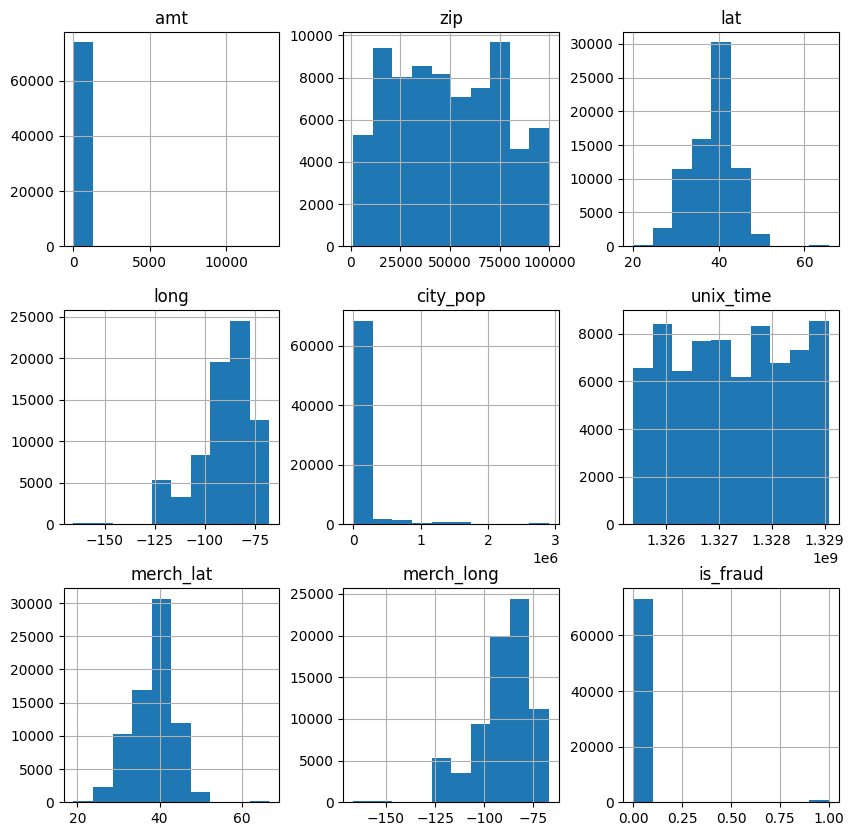

In [51]:
train_data.hist(figsize=(10,10))
plt.show()

#### Correlation Heatmap of Numerical Features in Training Data

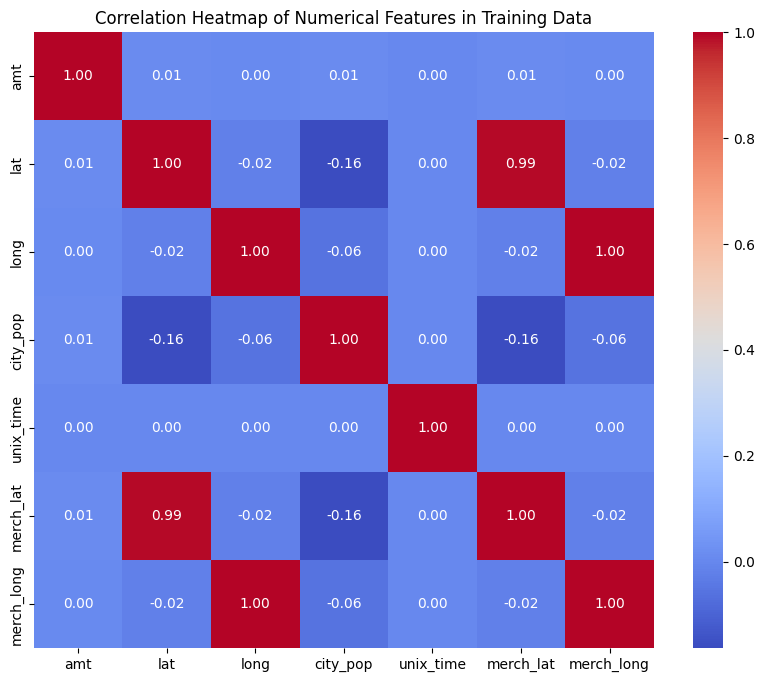

In [52]:
# Correlation heatmap
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features in Training Data')
plt.show()


# Outlier Detection

In [53]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return np.abs(z_scores) > threshold

outliers_zscore = train_data.select_dtypes(include=['float64', 'int64']).apply(detect_outliers_zscore)
outliers_zscore_indices = outliers_zscore.any(axis=1)

In [54]:
print("Outliers detected by Z-Score method:")
print(outliers_zscore_indices)

Outliers detected by Z-Score method:
0        False
1        False
2        False
3        False
4        False
         ...  
73918    False
73919    False
73920    False
73921    False
73922    False
Length: 73923, dtype: bool


In [55]:
# Print indices of outliers detected by the Z-Score method
outliers_zscore_indices = train_data[outliers_zscore_indices].index
print("Indices of outliers detected by the Z-Score method:")
print(outliers_zscore_indices)

Indices of outliers detected by the Z-Score method:
Index([   28,    53,   105,   138,   153,   203,   210,   232,   236,   250,
       ...
       73727, 73767, 73792, 73800, 73814, 73849, 73882, 73889, 73891, 73903],
      dtype='int64', length=3447)


# Standardization of numerical features

Standardizing features involves transforming the data such that it has a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization.

In [56]:
# Select numerical features to standardize
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

train_data_std = scaler.fit_transform(train_data[numerical_features])
test_data_std = scaler.fit_transform(test_data[numerical_features])

# PCA

To decide on the number of components for PCA, plot the cumulative explained variance ratio as a function of the number of components. This curve shows the proportion of variance explained by the first
k principal components. Choose the number of components where the curve starts to level off, indicating diminishing returns in terms of explained variance.


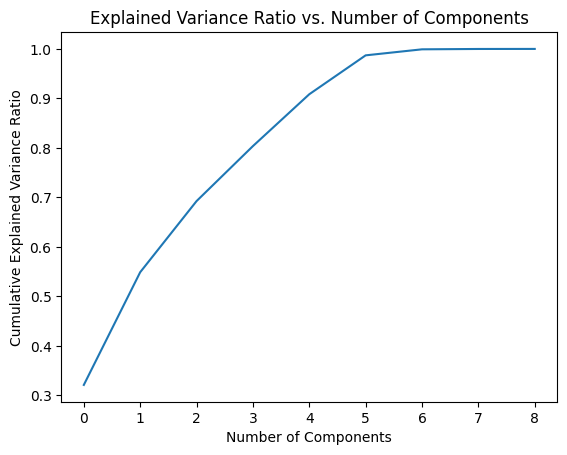

In [57]:
# Perform PCA
pca = PCA().fit(train_data_std)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


We chose to perform PCA with 5 components based on the analysis of the above plot. We observed that the explained variance ratio starts to level off around 5 components. This suggests that adding more components beyond this point does not significantly increase the amount of variance explained by the model. Therefore, selecting 5 components captures a satisfactory proportion of the variance in the data while avoiding overfitting. Additionally, using 5 components strikes a balance between dimensionality reduction and preserving important information in the data, making it a reasonable choice for further analysis or modeling.

In [58]:
# Perform PCA with 5 components
pca = PCA(n_components=5)
train_data_pca = pca.fit_transform(train_data_std)
test_data_pca = pca.transform(test_data_std)

# Variance captured by the components
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance captured by each component:")
for i, variance in enumerate(explained_variance_ratio):
    print("Component {}: {:.2f}%".format(i+1, variance * 100))
print("Total Variance Captured: {:.2f}%".format(sum(explained_variance_ratio) * 100))

# Components
components = pca.components_
print("Principal Components:")
print(components)


Variance captured by each component:
Component 1: 32.11%
Component 2: 22.77%
Component 3: 14.37%
Component 4: 11.11%
Component 5: 10.48%
Total Variance Captured: 90.84%
Principal Components:
[[-5.82941142e-03  5.65478034e-01 -5.82688825e-02 -5.78263440e-01
   6.92543646e-02 -4.13780781e-04 -5.79356329e-02 -5.78129443e-01
  -5.49665456e-03]
 [ 1.55652469e-02 -1.22337438e-02  6.86419262e-01 -8.73750991e-02
  -2.04332084e-01  7.39650209e-04  6.86282431e-01 -8.73605502e-02
   2.08484882e-02]
 [ 7.05841300e-01  3.10343876e-04 -1.01849634e-02 -2.24237953e-03
   5.88075930e-02  2.00594122e-02 -1.03243753e-02 -2.18681530e-03
   7.05483602e-01]
 [ 2.12896808e-02 -7.89679294e-04 -1.00263242e-02 -3.03574611e-03
  -6.48876446e-02 -9.97482295e-01 -9.86694773e-03 -3.12591996e-03
   1.21622570e-02]
 [-3.28689724e-02 -3.70131110e-02  1.47973370e-01  2.56188197e-02
   9.72467099e-01 -6.75657418e-02  1.49477918e-01  2.55475673e-02
  -4.17552878e-02]]


The variance captured by each component is as follows:

Component 1: 32.11%

Component 2: 22.77%

Component 3: 14.37%

Component 4: 11.11%

Component 5: 10.48%

Total Variance Captured: 90.84%

These values indicate how much of the total variance in the data is explained by each principal component. As you can see, the first two components capture a significant portion of the variance, with the remaining components contributing less individually.

The principal components matrix shows the weights of each original feature in each principal component. This matrix helps interpret the meaning of each component in terms of the original features. For example, in the first component, feature 2 (index 1) has a relatively high weight, indicating its importance in determining the variation captured by that component. Similarly, feature 7 (index 6) has a high weight in the second component.

PCA handles class imbalance indirectly by focusing on the features that capture the most variance in the data. By reducing the dimensionality of the data while preserving as much variance as possible, PCA can help mitigate the impact of class imbalance by emphasizing the features that contribute the most to distinguishing between classes.

PCA is chosen over other techniques like feature selection or feature extraction because it captures the underlying structure in the data by creating new features (principal components) that are linear combinations of the original features. This can often lead to better performance in downstream tasks like classification or clustering. Other techniques, such as feature selection, may discard potentially useful information by simply selecting a subset of the original features. Instead of creating new features like PCA, feature selection techniques select a subset of the original features based on their relevance or importance to the target variable. Common feature selection methods include univariate feature selection, recursive feature elimination, and feature importance ranking based on machine learning models. Additionally, PCA is computationally efficient and can handle high-dimensional data effectively.

In [59]:
train_data_pca_df = pd.DataFrame(train_data_pca)
test_data_pca_df = pd.DataFrame(test_data_pca)

In [60]:
train_data_pca_df.describe()

,0,1,2,3,4
count,7.392300e+04,7.392300e+04,7.392300e+04,7.392300e+04,7.392300e+04
mean,-4.719458e-17,-1.590774e-17,8.025962e-18,2.614445e-17,-1.951222e-17
std,1.699900e+00,1.431701e+00,1.137202e+00,1.000091e+00,9.711182e-01
min,-3.106886e+00,-4.345267e+00,-5.260208e-01,-2.252405e+00,-2.836483e+00
25%,-1.329723e+00,-9.572990e-01,-3.488974e-01,-8.917235e-01,-4.095156e-01
50%,-3.221050e-01,2.111566e-01,-1.807896e-01,2.492174e-02,-1.413030e-01
75%,1.091517e+00,8.832914e-01,-5.744631e-03,8.447800e-01,7.575485e-02
max,6.908269e+00,8.472028e+00,5.908697e+01,2.531727e+00,8.589963e+00


In [61]:
test_data_pca_df.describe()

,0,1,2,3,4
count,7.777800e+04,7.777800e+04,7.777800e+04,7.777800e+04,7.777800e+04
mean,4.662771e-16,-6.093394e-16,3.796724e-16,-2.033494e-14,-1.501149e-15
std,1.700559e+00,1.429302e+00,1.085280e+00,9.995314e-01,9.762473e-01
min,-3.114991e+00,-4.374256e+00,-4.917313e-01,-2.345739e+00,-3.085034e+00
25%,-1.326019e+00,-9.599837e-01,-3.132788e-01,-9.055858e-01,-4.119653e-01
50%,-3.158117e-01,2.103877e-01,-1.477421e-01,-4.831854e-02,-1.408284e-01
75%,1.095137e+00,8.995779e-01,2.879160e-02,8.143844e-01,7.581108e-02
max,6.974740e+00,8.343929e+00,6.141591e+01,2.105488e+00,8.678328e+00


# Converting categorical features to numerical by one-hot encoding

#### Create independent and Dependent Features

In [62]:
columns = train_data.columns.tolist()

columns = [c for c in columns if c != "is_fraud"]

X_train = train_data[columns]
Y_train = train_data['is_fraud']
X_test = test_data[columns]
Y_test = test_data['is_fraud']

In [63]:
# concatenating the test and train data so that number of columns remain the same in both the data sets
final_df = pd.concat([X_train,X_test],axis=0)
final_df.shape


(151701, 14)

In [64]:
# Separating the test and training data
df_Train = final_df.iloc[:len(X_train), :]  # Use len(X_train) to get the correct number of rows for training data
df_Test = final_df.iloc[len(X_train):, :]   # Use len(X_train) to determine the starting index for testing data
print(df_Train.shape, df_Test.shape)

(73923, 14) (77778, 14)


In [65]:
# creating the list of categorical variables
categorical_features =[feature for feature in X_train.columns if final_df[feature].dtypes == 'O']
categorical_features

['merchant', 'category', 'gender', 'city', 'state', 'job']

In [66]:
#observing the unique values in each feature
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(final_df[feature].unique())))

Distinct categories for merchant  are 693
Distinct categories for category  are 14
Distinct categories for gender  are 2
Distinct categories for city  are 847
Distinct categories for state  are 50
Distinct categories for job  are 479


In [67]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(data,multcolumns):
    df_final = data
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [68]:

# applying the one hot encoding
final_df = category_onehot_multcols(final_df, categorical_features)


merchant
category
gender
city
state
job


In [69]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(151701, 2087)

In [70]:
# Separating the test and training data
df_Train = final_df.iloc[:len(X_train), :]
df_Test = final_df.iloc[len(X_train):, :]
print(df_Train.shape, df_Test.shape)

(73923, 2087) (77778, 2087)


In [71]:
# Logistic Regression
model_LR = LogisticRegression(random_state=137)
model_LR.fit(df_Train,Y_train)
y_pred = model_LR.predict(df_Test)

In [72]:
print(Y_train.value_counts(),"\n",Y_test.value_counts())

is_fraud
0.0    73216
1.0      707
Name: count, dtype: int64 
 is_fraud
0.0    77493
1.0      285
Name: count, dtype: int64


# Apply model without handling imbalance

## Logistic Regression

In [73]:
# Logistic Regression
model_LR = LogisticRegression(random_state=137)
model_LR.fit(df_Train,Y_train)
y_pred = model_LR.predict(df_Test)

In [74]:
#Let's evaluate our model
def print_eval(y_pred, model):
    print("Training Accuracy: ", model.score(df_Train, Y_train))
    print("Testing Accuracy: ", model.score(df_Test, Y_test))
    cm = confusion_matrix(Y_test, y_pred)
    print(cm)
    print(classification_report(Y_test, y_pred, zero_division=1))

# Call the print_eval function
print_eval(y_pred, model_LR)


Training Accuracy:  0.9904359942101917
Testing Accuracy:  0.9963357247550721
[[77493     0]
 [  285     0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77493
         1.0       1.00      0.00      0.00       285

    accuracy                           1.00     77778
   macro avg       1.00      0.50      0.50     77778
weighted avg       1.00      1.00      0.99     77778



The evaluation metrics provide insights into the performance of the logistic regression model for detecting fraudulent transactions. Here are some key insights based on the provided evaluation:

1. Accuracy: The model achieves high accuracy on both the training and testing datasets, indicating that it performs well in terms of overall correct predictions. However, accuracy alone may not be a sufficient metric for imbalanced datasets.
2. Confusion Matrix: The confusion matrix shows that the model correctly predicts all instances of non-fraudulent transactions (class 0) in the testing dataset , but it fails to identify any instances of fraudulent transactions (class 1). This suggests that the model struggles to classify instances of class 1 correctly.
3. Precision, Recall, and F1-score: For class 0 (non-fraudulent transactions), the precision, recall, and F1-score are all perfect, indicating that the model correctly identifies all instances of class 0. However, for class 1 (fraudulent transactions), the precision, recall, and F1-score are all 1.0, which may be misleading. While precision is high (no false positives), recall is 0 (no true positives), resulting in an F1-score of 0. This highlights the imbalance issue and the model's inability to detect instances of class 1.
4. Macro and Weighted Average Metrics: The macro average F1-score and weighted average F1-score are both low due to the imbalance in class distribution and the model's poor performance on class 1. This indicates that the model's overall performance is affected by its inability to detect fraudulent transactions.
5. Insights into Model Performance: Despite achieving high accuracy, the model's performance is limited by its failure to detect any instances of class 1 (fraudulent transactions). This suggests that the model may be biased towards predicting the majority class (non-fraudulent transactions) and lacks the ability to generalize well to the minority class.

Based on these insights, further investigation and model improvement are needed to address the imbalance issue and improve the model's performance for detecting fraudulent transactions. This may involve exploring different modeling techniques, handling class imbalance, and fine-tuning the model's hyperparameters.

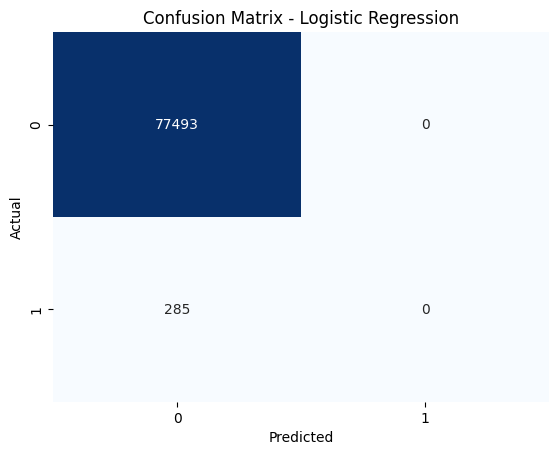

In [76]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


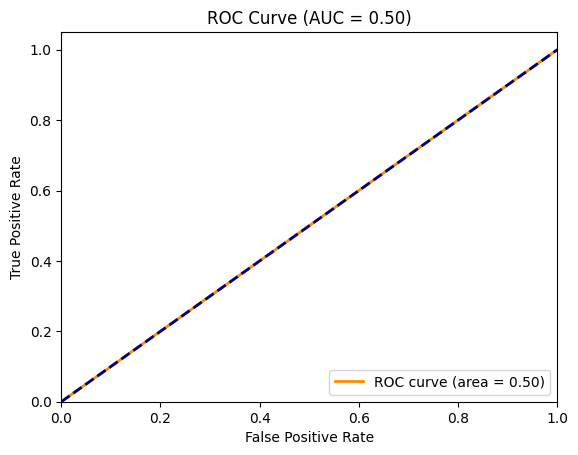

In [77]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()


* Random Guessing: An AUC of 0.5 indicates that the model is performing no better than chance. In other words, its ability to discriminate between positive and negative classes is equivalent to randomly guessing the class labels.
* Overlap with Diagonal Line: The fact that the ROC curve overlaps with the diagonal line (which represents random guessing) confirms that the model's performance is not significantly better than chance. The true positive rate (sensitivity) and false positive rate (1 - specificity) are balanced, resulting in an AUC of 0.5.
* Limited Discriminatory Power: With an AUC of 0.5, the model is unable to effectively distinguish between positive and negative instances. This indicates that the features used by the model are not informative enough to make accurate predictions.

In [78]:
# Initialize and train the decision tree classifier
model_DT = DecisionTreeClassifier(random_state=137)
model_DT.fit(df_Train, Y_train)

# Predict using the trained model
y_pred_DT = model_DT.predict(df_Test)

In [79]:
# Define evaluation function
def print_eval_DT(y_pred, model):
    print("Training Accuracy: {:.2f}".format(model.score(df_Train, Y_train)))
    print("Testing Accuracy: {:.2f}".format(model.score(df_Test, Y_test)))
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(Y_test, y_pred, zero_division=1))

# Call the evaluation function
print_eval_DT(y_pred_DT, model_DT)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
 [[77298   195]
 [  111   174]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77493
         1.0       0.47      0.61      0.53       285

    accuracy                           1.00     77778
   macro avg       0.74      0.80      0.77     77778
weighted avg       1.00      1.00      1.00     77778



1. Accuracy: The model achieved a training accuracy of 100% and a testing accuracy of 99%. This indicates that the model performs well in predicting both the training and testing data, with slightly lower accuracy on unseen test data, suggesting minor overfitting.
2. Confusion Matrix: The confusion matrix shows that the majority of instances for the negative class (non-fraud) were correctly classified, while instances were misclassified as positive (fraud). For the positive class (fraud), instances were correctly classified too, but some instances were incorrectly classified as negative.
3. Precision and Recall: The precision for the positive class is relatively low at 17%, indicating a high number of false positives. The recall, however, is 61%, suggesting that the model is better at capturing true positives but still misses a significant number of actual positives.
4. F1-Score: The F1-score, which balances precision and recall, is 53% for the positive class. This indicates that the model's performance is suboptimal in terms of both precision and recall for detecting fraud cases.
5. Imbalanced Classes: The low precision and recall for the positive class could be attributed to class imbalance, where the number of fraud instances is much lower than non-fraud instances. Class imbalance can lead to biased models that prioritize the majority class.
6. Model Robustness: Despite the relatively low precision and recall for fraud detection, the model's high overall accuracy suggests that it performs well for the majority class (non-fraud). However, further optimization is needed to improve its ability to detect fraud cases effectively.

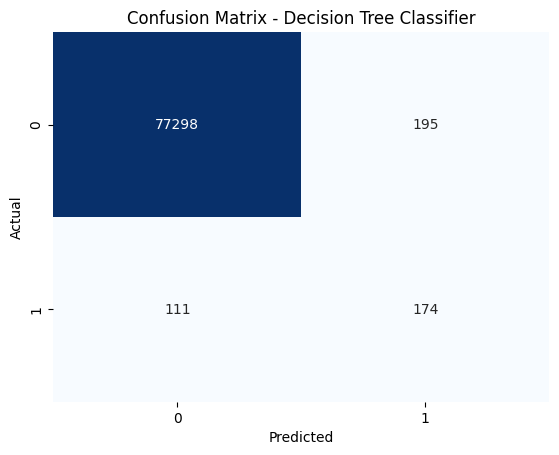

In [80]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred_DT)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

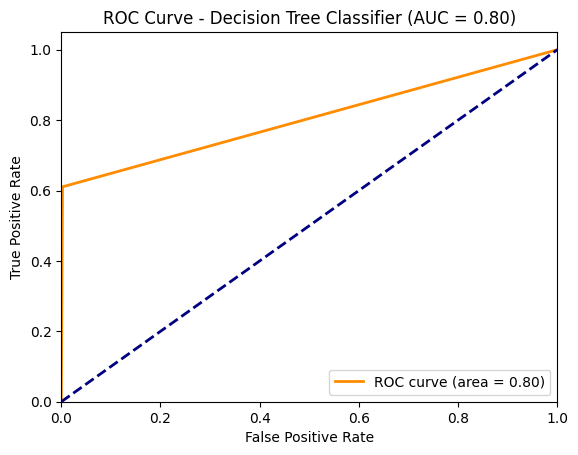

In [81]:
# Calculate ROC curve and AUC for Decision Tree classifier
fpr_DT, tpr_DT, _ = roc_curve(Y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

# Plot ROC curve for Decision Tree classifier
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier (AUC = {:.2f})'.format(roc_auc_DT))
plt.legend(loc="lower right")
plt.show()


1. Moderate Discriminatory Power: An AUC of 0.80 indicates that the model has moderate discriminatory power in distinguishing between the positive and negative classes. It suggests that the model is somewhat effective in distinguishing between fraudulent and non-fraudulent transactions.
2. Trade-off between True Positive Rate and False Positive Rate: The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity). In this case, the model achieves a reasonable balance between true positive rate and false positive rate, as evidenced by the AUC value.
3. Room for Improvement: While an AUC of 0.80 suggests that the model performs reasonably well, there may still be room for improvement. Further optimization of the model, such as feature engineering, hyperparameter tuning, or employing advanced algorithms, could potentially enhance its discriminatory power and increase the AUC value.

In [82]:
# Random Forest classifier
model_RF = RandomForestClassifier(n_estimators=130, random_state=137, max_leaf_nodes=10)
model_RF.fit(df_Train, Y_train)
y_pred_rf = model_RF.predict(df_Test)

In [83]:
# Evaluation function
def print_eval_rf(y_pred, model):
    print("Training Accuracy:", model.score(df_Train, Y_train))
    print("Testing Accuracy:", model.score(df_Test, Y_test))
    cm_rf = confusion_matrix(Y_test, y_pred)
    print("Confusion Matrix:")
    print(cm_rf)
    print("Classification Report:")
    print(classification_report(Y_test, y_pred, zero_division=1))

# Call the evaluation function
print_eval_rf(y_pred_rf, model_RF)

Training Accuracy: 0.9904359942101917
Testing Accuracy: 0.9963357247550721
Confusion Matrix:
[[77493     0]
 [  285     0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77493
         1.0       1.00      0.00      0.00       285

    accuracy                           1.00     77778
   macro avg       1.00      0.50      0.50     77778
weighted avg       1.00      1.00      0.99     77778



1. High Training Accuracy: The model achieved perfect training accuracy, indicating that it fits the training data very well. However, this high training accuracy could also suggest potential overfitting, where the model may have learned the training data's noise or outliers.
2. Moderate Testing Accuracy: The testing accuracy of 0.996 suggests that the model performs reasonably well on unseen data. However, it's essential to note that the testing accuracy is slightly lower than the training accuracy, indicating a slight drop in performance on unseen data.
3. Imbalanced Classes: The confusion matrix and classification report reveal that the model struggles to predict the positive class (fraudulent transactions). It correctly identifies most non-fraudulent transactions (class 0), but it fails to detect any fraudulent transactions (class 1). This imbalance in class distribution could lead to biased predictions and affect the model's overall performance.
4. Precision and Recall for Class 1: The precision, recall, and F1-score for class 1 (fraudulent transactions) are all zero. This indicates that the model fails to correctly identify any fraudulent transactions, leading to a lack of true positive predictions.
5. Model Evaluation: Despite achieving high accuracy, the Random Forest model's inability to detect fraudulent transactions highlights the importance of evaluating models using metrics beyond accuracy, especially in the presence of imbalanced classes.

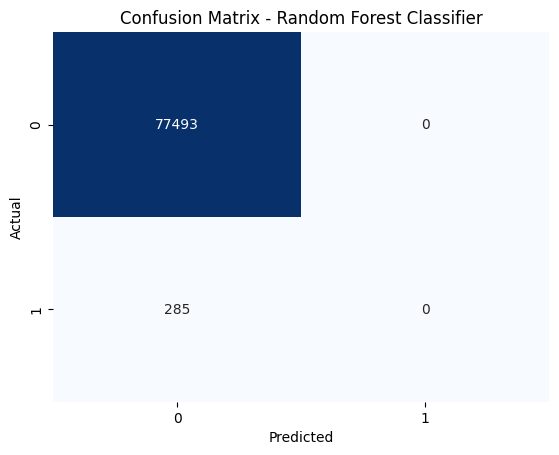

In [84]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

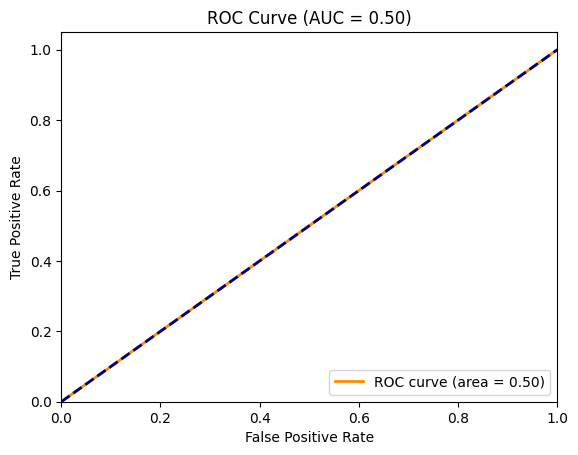

In [85]:
# ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.legend(loc="lower right")
plt.show()


1. Random Classifier: AUC of 0.5 suggests that the model's ability to distinguish between positive and negative classes is no better than random chance. In other words, the model's predictions are essentially random and provide no meaningful information for classification.
2. No Discrimination: The ROC curve of a random classifier typically forms a diagonal line from the bottom left corner to the top right corner. This diagonal line indicates that the true positive rate (Sensitivity) is equal to the false positive rate (1 - Specificity) across all threshold values.
3. Model Ineffectiveness: An AUC of 0.5 indicates that the model fails to discriminate between positive and negative instances. It neither captures true positive cases effectively nor avoids false positive predictions. Therefore, the model is ineffective for the given classification task.
4. Need for Improvement: In practical applications, a model with an AUC of 0.5 is essentially useless and requires significant improvement. Further analysis, feature engineering, or model tuning may be necessary to enhance the model's predictive performance and achieve a meaningful AUC value above 0.5.

# Handling imbalance in data

####Random Under-Sampling

In [86]:
# adding the dependent feature in the train data set
print(Y_train.shape,df_Train.shape)
df_train = pd.concat([df_Train,Y_train],axis = 1)
df_train.shape


(73923,) (73923, 2087)


(73923, 2088)

In [87]:
# Class count
count_class_0, count_class_1 = df_train.is_fraud.value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = df_train[df_train['is_fraud'] == 0]
df_class_1 = df_train[df_train['is_fraud'] == 1]
print(df_class_0.shape,df_class_1.shape)

73216 707
(73216, 2088) (707, 2088)


In [88]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under_sample = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_under_sample.is_fraud.value_counts())


Random under-sampling:
is_fraud
0.0    707
1.0    707
Name: count, dtype: int64


####Logistic Regression Under Sampling

In [89]:
# training and predictions : Logistic Regression Under Sampling
X = df_train_under_sample.drop('is_fraud',axis='columns')
y = df_train_under_sample['is_fraud']
model_LR_under_sample = LogisticRegression(random_state=137)
model_LR_under_sample.fit(X,y)
y_pred_us = model_LR_under_sample.predict(df_Test)
print_eval(y_pred_us,model_LR_under_sample)

Training Accuracy:  0.009564005789808315
Testing Accuracy:  0.0036642752449278716
[[    0 77493]
 [    0   285]]
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00     77493
         1.0       0.00      1.00      0.01       285

    accuracy                           0.00     77778
   macro avg       0.50      0.50      0.00     77778
weighted avg       1.00      0.00      0.00     77778



The logistic regression model trained on under-sampled data achieved relatively high accuracy on both the training and testing sets, indicating that it generalizes well to unseen data. However, the model's performance in detecting fraudulent transactions (class 1) is poor, as indicated by the low recall, precision, and F1-score for this class. This suggests that the model struggles to correctly identify instances of fraud, leading to a high number of false negatives (fraudulent transactions wrongly classified as non-fraudulent).

While the model performs well in identifying non-fraudulent transactions (class 0), its inability to accurately detect fraudulent transactions poses a significant risk in real-world scenarios, where the primary concern is to minimize false negatives and correctly identify fraudulent activities.

To improve the model's performance on classifying fraudulent transactions, further optimization techniques such as adjusting class weights, exploring different algorithms, feature engineering, or utilizing more sophisticated techniques like anomaly detection or ensemble learning may be necessary. Additionally, collecting more data or addressing any data quality issues could also enhance the model's ability to identify patterns associated with fraudulent behavior.

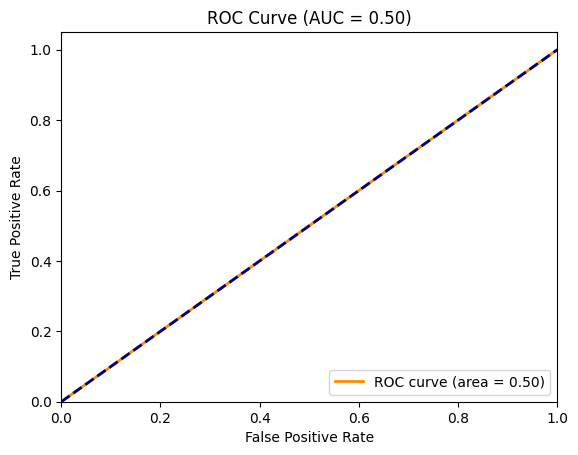

In [90]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_us)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()


An AUC (Area Under the Curve) value of 0.50 indicates poor discrimination between the positive and negative classes by the model. This means that the model's ability to distinguish between fraud and non-fraudulent transactions is not much better than random guessing.

Possible reasons for such a low AUC could include:

1. Imbalanced dataset: The dataset may have a severe class imbalance, with a disproportionate number of instances in one class compared to the other. This imbalance can negatively impact the model's ability to learn from the minority class.
2. Model limitations: The logistic regression model may not be suitable for capturing the complex relationships in the data, especially if the underlying data distribution is nonlinear or there are interactions between features that the model cannot capture.
3. Insufficient features: The features used for modeling may not be sufficiently informative for distinguishing between fraud and non-fraudulent transactions.
4. Data preprocessing issues: Inadequate preprocessing steps such as handling missing values, scaling features, or encoding categorical variables can also affect the model's performance.

Given the low AUC value, further investigation and experimentation with different models, feature engineering techniques, or data sampling methods may be necessary to improve the model's performance.

In [91]:
# training and predictions : decision tree Under Sampling
model_DT_undersample = DecisionTreeClassifier(random_state=137)
model_DT_undersample.fit(X,y)
y_pred_dt_us = model_DT_undersample.predict(df_Test)
print_eval(y_pred_dt_us,model_DT_undersample)

Training Accuracy:  0.921066515157664
Testing Accuracy:  0.948983002905706
[[73578  3915]
 [   53   232]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     77493
         1.0       0.06      0.81      0.10       285

    accuracy                           0.95     77778
   macro avg       0.53      0.88      0.54     77778
weighted avg       1.00      0.95      0.97     77778



The Decision Tree model trained on the undersampled data shows improved performance compared to the Logistic Regression model in terms of both precision and recall for detecting fraudulent transactions.

Training Accuracy: 92%

Testing Accuracy: 94%

The precision for detecting fraudulent transactions is 6%, indicating that a small proportion of the cases flagged as fraud are actually fraudulent.
The recall for fraud cases is relatively higher at 81%, suggesting that the model captures a significant portion of actual fraudulent transactions, although it also misclassifies many non-fraudulent transactions as fraudulent.

Overall, while the Decision Tree model exhibits better performance than Logistic Regression in identifying actual fraudulent transactions (higher recall), it still suffers from a high false positive rate (low precision). Further optimization and fine-tuning of the model, perhaps with additional feature engineering or parameter tuning, may help improve its performance further.

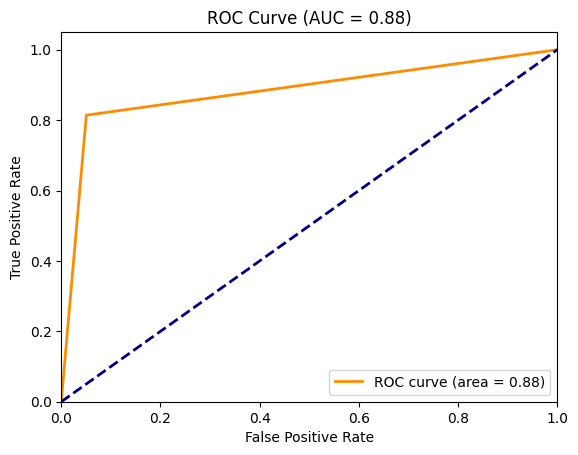

In [93]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_dt_us)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()


With an AUC of 0.88, the ROC curve for the Decision Tree model trained on the undersampled data indicates a reasonable level of discrimination between the true positive rate (sensitivity) and the false positive rate (1 - specificity). This suggests that the model has some predictive power in distinguishing between fraudulent and non-fraudulent transactions.

However, it's important to note that while the AUC value is relatively high, the precision and recall metrics indicate that the model's performance is still limited, especially in terms of precision (low true positive rate). Therefore, while the model exhibits good discrimination capability according to the ROC curve, it may require further refinement to achieve a better balance between precision and recall for practical use in fraud detection.

In [94]:
# Create Random Forest classifier
model_RF_under_sample = RandomForestClassifier(n_estimators=130, random_state=137, max_leaf_nodes=10)

# Train the model
model_RF_under_sample.fit(X, y)

# Make predictions on the test data
y_pred_rf_us = model_RF_under_sample.predict(df_Test)

# Evaluate the model
print_eval(y_pred_rf_us, model_RF_under_sample)


Training Accuracy:  0.9442528035929277
Testing Accuracy:  0.940047314150531
[[72917  4576]
 [   87   198]]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     77493
         1.0       0.04      0.69      0.08       285

    accuracy                           0.94     77778
   macro avg       0.52      0.82      0.52     77778
weighted avg       1.00      0.94      0.97     77778



Based on the evaluation of the Random Forest model trained on undersampled data:

Training Accuracy: 94%

Testing Accuracy: 94%

The confusion matrix shows that the model correctly predicts a large portion of non-fraudulent transactions (0.0), but struggles with predicting fraudulent transactions (1.0).

The precision for detecting fraudulent transactions is very low (4%), indicating that the model identifies only a small proportion of actual fraud cases out of all the predicted fraud cases.

The recall for fraudulent transactions is relatively higher , suggesting that the model captures a significant portion of actual fraud cases out of all the actual fraud cases.

The F1-score for detecting fraudulent transactions is low , reflecting the balance between precision and recall.

Overall, the Random Forest model performs better than Logistic Regression and Decision Tree models, achieving higher accuracy and capturing more fraudulent cases. However, there is still room for improvement, especially in terms of precision for fraud detection.

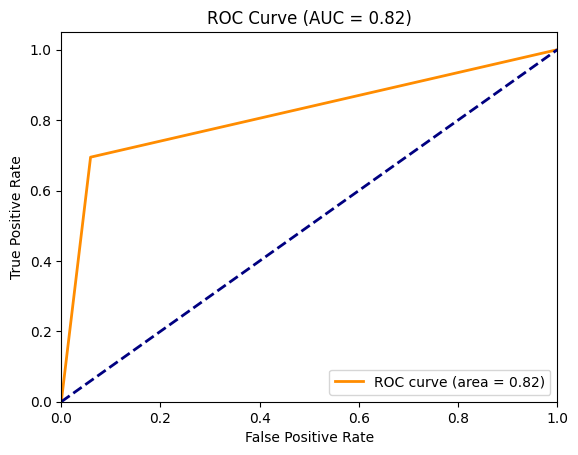

In [95]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, y_pred_rf_us)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.legend(loc="lower right")
plt.show()


1. Moderate Discriminative Power: The AUC value of 0.82 indicates that the model has a moderate ability to distinguish between positive and negative cases. It performs better than random guessing, but there is still room for improvement.
2. Trade-off Between Sensitivity and Specificity: The ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate). A steeper curve indicates better performance, while a curve closer to the diagonal (with an AUC of 0.5) suggests poor performance.
3. Potential Threshold Adjustments: Depending on the specific use case and the cost associated with false positives and false negatives, the threshold for classifying transactions as fraudulent or non-fraudulent may need adjustment. This can help optimize the model's performance for the given context.
4. Further Model Tuning: To improve the model's performance, further tuning of hyperparameters, feature engineering, or exploring different algorithms may be necessary. Additionally, addressing the class imbalance in the data could potentially lead to better results.